In [151]:
from numpy import loadtxt
import numpy as np
from sklearn.model_selection import train_test_split
import random
from sklearn.decomposition import PCA
import math
from scipy.spatial.distance import cityblock
from scipy.spatial.distance import euclidean
from sklearn.metrics import accuracy_score #scoring
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from matplotlib import animation, colors

data = "bank_data.txt"






In [152]:
def Partition_data(data):
    
    lines = loadtxt("bank_data.txt", comments="#", delimiter=",", unpack=False)

    s1 = np.size(lines,axis = 0)
    s2 = np.size(lines,axis = 1)


    features = lines[0:s1,0:4]
    label = lines[0:s1,4]

    features = features - np.amin(features[0:s1,0:4],axis=0)
    features = (features)/(np.amax(features[0:s1,0:4],axis=0))

    X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.33)
    
    return X_train, X_test, y_train, y_test, s1, s2


In [153]:
def Initialize_dimensions(X_train,X_test,s1,s2):
    
    pca = PCA(n_components = 2)
    X_train_p = pca.fit_transform(X_train)
    X_test_p = pca.transform(X_test)
    explained_variance = pca.explained_variance_ratio_

    ratio = explained_variance[0]/explained_variance[1]
    area = 5* math.sqrt(np.size(X_train, axis=0))

    d3 = s2-1
    d2 = round(math.sqrt(area/ratio))
    d1 = round(d2*ratio)


    W = np.random.uniform(0,1,d1*d2*d3)
    W = W.reshape([d1,d2,d3])
    
    return W,d1,d2,d3


In [154]:
def Initialize_Euclidian_grid(d1,d2,d3):

    d11 = d1*2+1
    d22 = d2*2+1

    man_grid = np.zeros([d11,d22])

    centre = d1,d2

    for i in range(d11):
      for j in range(d22):
        man_grid[i,j] = euclidean(centre, [i,j])

    man_grid = np.repeat(man_grid,d3)
    man_grid = np.reshape(man_grid, [d11,d22,d3],order = 'C')
    
    return man_grid

In [155]:
def Training_loop(W_current,X_train,T_one,Total_iter,inp,d1,d2,decay,Euclidian_grid):
    
    exp_rate = np.zeros([round(Total_iter)])
    
    for current_t in range(round(Total_iter)):                                # Placeholder
      
      T_two = -np.max(Euclidian_grid)/(math.log(decay[current_t]))           
      ht = np.exp(-Euclidian_grid/T_two)
      dist = np.sum(np.square(X_train[inp[current_t]] - W_current),axis = 2)
      closest = np.where(dist == np.min(dist))
      closest = [closest[0][0],closest[1][0]]
      filter = (ht[int(d1-closest[0]):int(d1*2-closest[0]),int(d2-closest[1]):int(d2*2-closest[1])])

      nt = math.exp(-current_t/T_one)
      exp_rate[current_t] = nt  
      W_next = W_current + nt*filter*(X_train[inp[current_t]]-W_current)
      W_current = W_next
    
    return W_current, exp_rate


In [156]:
def Testing_loop(W_current,y_train,d1,d2,X_train):
    
    label_data = y_train
    Map = np.empty(shape=(d1, d2), dtype=object)

    for row in range(d1):
      for col in range(d2):
        Map[row][col] = [] # empty list to store the label


    for t in range(X_train.shape[0]):

      dist = np.sum(np.square(X_train[t] - W_current),axis = 2)
      closest = np.where(dist == np.min(dist))
      winner = [closest[0][0],closest[1][0]]
      Map[winner[0]][winner[1]].append(label_data[t]) # label of winning neuron
        
    return Map

In [157]:
def Graphing(Map,d1,d2):
    
    label_map = np.zeros(shape=(d1, d2),dtype=np.int64)
    for row in range(d1):
      for col in range(d2):
        label_list = Map[row][col]
        if len(label_list)==0:
          label = 2
        else:
          label = max(label_list, key=label_list.count)
        label_map[row][col] = label

    title = ('Iteration')
    cmap = colors.ListedColormap(['tab:green', 'tab:red','tab:orange',])
    plt.imshow(label_map, cmap=cmap)
    plt.colorbar()
    plt.title(title)
    plt.show()

In [158]:
def Self_organizing_map(data):
    
    X_train,X_test,y_train,y_test,s1,s2 = Partition_data(data)
    W,d1,d2,d3 = Initialize_dimensions(X_train,X_test,s1,s2)
    Euclidian_grid = Initialize_Euclidian_grid(d1,d2,d3)
    
    Total_iter = 500*d1*d2                             # No. of iterations        
    T_one = -Total_iter/math.log(0.1)                  # Adjust so that learnig rate varies from 1 - 0.0001
    max_dist = math.sqrt(pow(d1-1,2)+pow(d2-1,2))
    T_two = -np.max(Euclidian_grid)/(math.log(0.05))           # Adjust distance relation so that it varies from ...
    ht = np.exp(-Euclidian_grid/T_two)
    Input = np.random.randint(np.shape(X_train)[0],size = Total_iter)
    
    
    
    T_two_1 = -np.max(Euclidian_grid)/(math.log(0.000000000001))                          # Adjust distance relation so that it varies from ...
    ht_1 = np.exp(-Euclidian_grid/T_two_1)

    
    
    
    n = math.pow((0.05/0.00000000001),(1/Total_iter))
    a = list(range(Total_iter))
    decay = 0.05/(np.power(n,a))
    
    

    
    
    
    
    Trained_W, exp_rate = Training_loop(W,X_train,T_one,Total_iter,Input,d1,d2,decay,Euclidian_grid)
    Result = Testing_loop(Trained_W,y_train,d1,d2,X_train)
    plt.plot(exp_rate)
    plt.show()
    Graph = Graphing(Result,d1,d2)
    

    

    
    return Trained_W
    
    

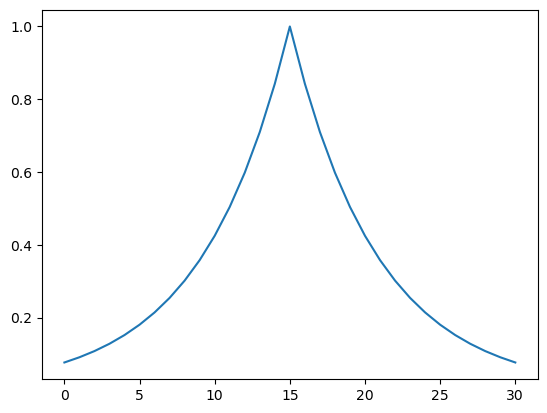

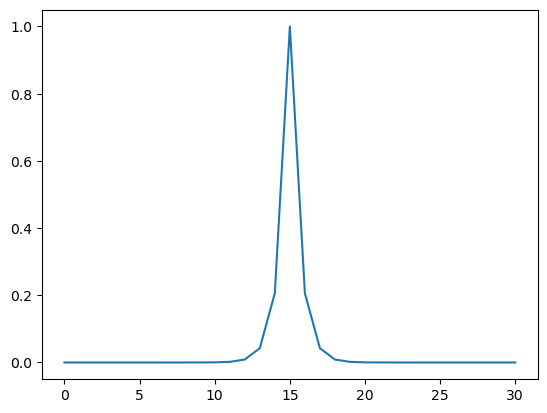

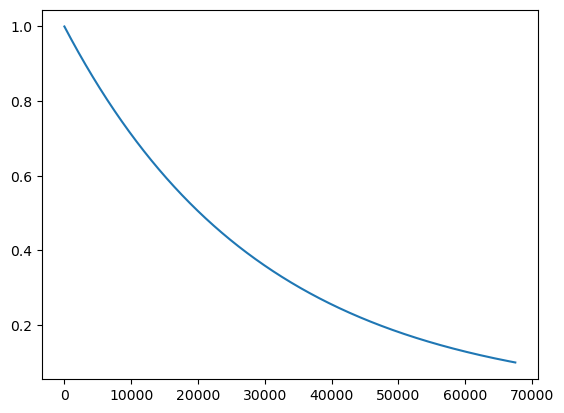

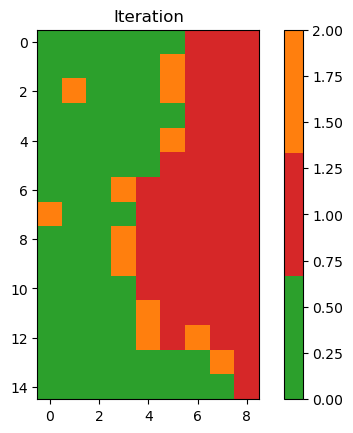

In [159]:
output = Self_organizing_map(data)

[0, 1, 2, 3, 4, 5, 6, 7, 8]

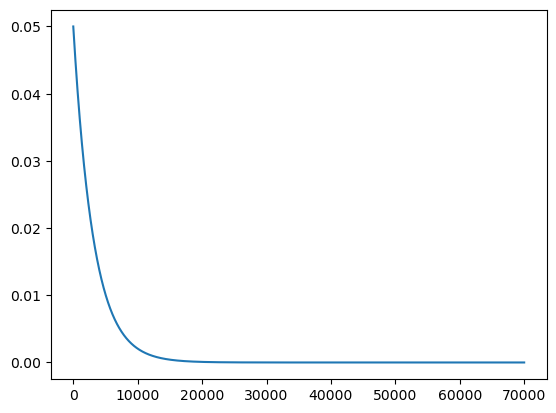